In [11]:
import numpy as np


In [12]:
# stimulus -u
# reward -r
# weight -w
# delta -d
# Dayan page 338 example

T = 300 # trial length
stim_time = 100 
rew_time = 250
num_trials = 500
e = .8 # learning rate
u = np.zeros(T)
r = np.zeros(T)
v = np.zeros(T)
w = np.zeros(T)
u[stim_time] = 1
r[rew_time:rew_time+1] = 1
all_delta = np.zeros([num_trials,T])
all_v = np.zeros([num_trials,T])
all_w = np.zeros([num_trials,T])

In [13]:
for i in range(num_trials):
    for t in range(1,T):
        v[t] = sum([w[tao]*u[t-tao] for tao in range(t)])
        delta = r[t-1]+v[t]-v[t-1]
        all_delta[i,t] = delta
        for tao in range(T):
            w[tao] = w[tao]+e*delta*u[t-1-tao]
    all_v[i,:] = v
    all_w[i,:] = w

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

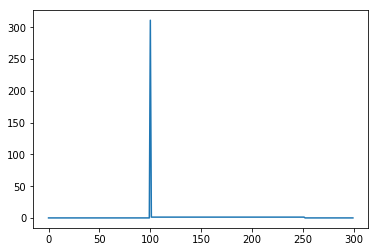

In [53]:
plt.plot(sum(all_delta,0))
plt.show()

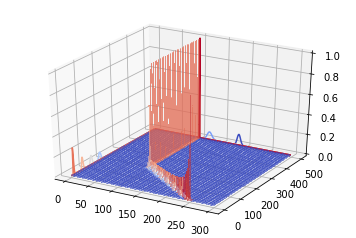

In [51]:
np.broadcast_arrays(Z)
x = np.arange(0,num_trials,1) 
y = np.arange(0,T,1) 
X, Y = np.meshgrid(y, x)
Z = all_delta

ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, all_delta, linewidth = 0.1, cmap = cm.coolwarm, antialiased= False, alpha = 0.5)

cset = ax.contour(X, Y, Z, zdir='x', offset= 0, cmap=cm.coolwarm,linewidth = 2)
cset = ax.contour(X, Y, Z, zdir='y', offset= num_trials, cmap=cm.coolwarm,linewidth = 2)


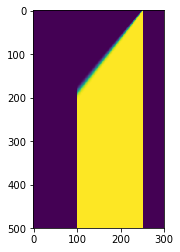

In [41]:
plt.imshow((all_v - min(all_v.flatten()))/(max(all_v.flatten())-min(all_v.flatten())))
plt.show()

In [54]:
# adding trials without reward
r = np.zeros(T)
all_delta_omit = np.zeros([num_trials,T])
all_v_omit = np.zeros([num_trials,T])
for i in range(num_trials):
    for t in range(T-1):
        v[t] = sum([w[tao]*u[t-tao] for tao in range(t)])
        delta = r[t]+v[t+1]-v[t]
        all_delta_omit[i,t] = delta
        for tao in range(T):
            w[tao] = w[tao]+e*delta*u[t-tao]
        all_v_omit[i,:] = v

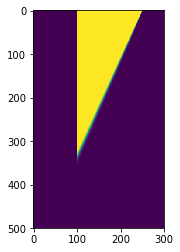

In [55]:
plt.imshow(all_v_omit/max(all_v_omit.flatten()))
plt.show()

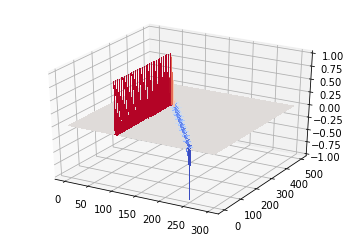

In [56]:
Z = all_delta_omit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap = cm.coolwarm,linewidth = 0.1,antialiased= False)

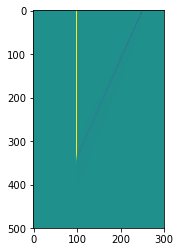

In [57]:
plt.imshow(all_delta_omit/max(all_delta_omit.flatten()))
plt.show()